# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [33]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10 #10
page_size = 100 #100

reviews = []
aircraft = []
seat_type = []
route = []
recommended = []
df = pd.DataFrame()

# for i in range(1, pages + 1):
for i in range(1, pages + 1):
    
    rating = []
    category = []

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    for para2 in parsed_content.find_all("div", {"class" : "review-stats"}):
        for para3 in para2.find_all('td',{'class' : 'review-value'}):
            rating.append(para3.get_text())
        recomend = rating[-1]
        rating = rating[:-1]
        
        for para4 in para2.find_all('td',{'class' : 'review-rating-stars stars'}):
            para5 = len(para4.find_all('span', {'class' : 'star fill'}))
            rating.append(para5)
        rating.append(recomend)
        #print(rating)
        
        for para6 in para2.find_all('td',{'class' : 'review-rating-header'}):
            category.append(para6.get_text())
            
        #print(category)
        # Create the records from both list, using zip and dict calls.

        # Build the dataframe from the dictionary.
        data_dict = pd.DataFrame([rating], columns=category)
        df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
        #print(df)
        rating = []
        category = []
        
    print(f"   ---> {len(reviews)} total reviews")

df["reviews"] = reviews

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [24]:
df.head(5)

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity,reviews
0,A320,Couple Leisure,Economy Class,Marseille to London,December 2022,3.0,3.0,2.0,4.0,5,yes,NaN,NaN,✅ Trip Verified | Old A320 with narrow pitch....
1,Boeing 777-300,Couple Leisure,First Class,London to Male,December 2022,2.0,2.0,1.0,3.0,1,no,1.0,1.0,✅ Trip Verified | Another BA Shambles. Starte...
2,A320,Solo Leisure,Economy Class,Keflavik to London Heathrow,December 2022,2.0,3.0,NaN,1.0,1,no,NaN,NaN,Not Verified | BA cancelled my flight home to...
3,NaN,Business,Business Class,London Heathrow to Frankfurt,October 2022,3.0,4.0,3.0,1.0,1,no,NaN,NaN,"Not Verified | BA cancelled my flight home, t..."
4,NaN,Solo Leisure,Economy Class,London Heathrow to Bangkok via Doha,December 2022,2.0,2.0,2.0,1.0,1,no,2.0,NaN,✅ Trip Verified | Turned up 3.5 hours in advan...


In [14]:
df.to_csv(r"C:\PRAJUKTA\data_prajukta\BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# Data Cleaning

In [25]:
df.to_csv("BA_reviews.csv", index=False)

In [26]:
df = pd.read_csv('BA_reviews.csv')

In [27]:
df.shape

(1000, 14)

In [28]:
remove_text = ['✅ Trip Verified', 'Not Verified |']

for i in range(len(df['reviews'])):
    for j in remove_text:
        if j in df['reviews'][i]:
            df['reviews'] = df['reviews'].str.replace(j,'')

<ipython-input-28-6b7437e0fbc7>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace(j,'')


In [30]:
df.head(5)

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity,reviews
0,A320,Couple Leisure,Economy Class,Marseille to London,December 2022,3.0,3.0,2.0,4.0,5,yes,NaN,NaN,| Old A320 with narrow pitch. Flight perfect...
1,Boeing 777-300,Couple Leisure,First Class,London to Male,December 2022,2.0,2.0,1.0,3.0,1,no,1.0,1.0,| Another BA Shambles. Started off well with...
2,A320,Solo Leisure,Economy Class,Keflavik to London Heathrow,December 2022,2.0,3.0,NaN,1.0,1,no,NaN,NaN,| BA cancelled my flight home to Heathrow on ...
3,NaN,Business,Business Class,London Heathrow to Frankfurt,October 2022,3.0,4.0,3.0,1.0,1,no,NaN,NaN,"| BA cancelled my flight home, the last fligh..."
4,NaN,Solo Leisure,Economy Class,London Heathrow to Bangkok via Doha,December 2022,2.0,2.0,2.0,1.0,1,no,2.0,NaN,"| Turned up 3.5 hours in advance, Terminal 5 ..."


# Data Analysis

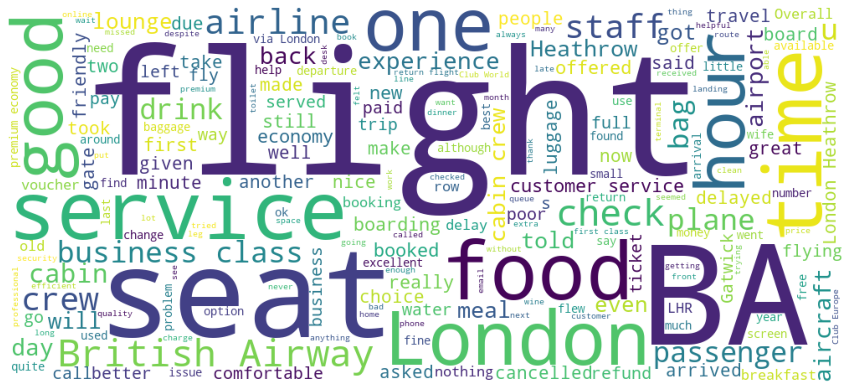

In [34]:
review_word = []

for i in df['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

From the wordcloud above, we can see the most used topics in customer review are flight, seat , service and time, showing that people are actively talking about their experience on the plane and the staff.

# Satisfaction of the Customer

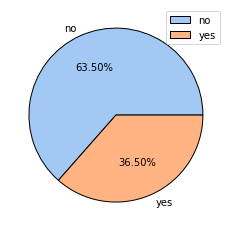

In [35]:
soc = df.groupby('Recommended')['reviews'].count().reset_index()
plt.pie(soc['reviews'], labels = soc['Recommended'], autopct='%.2f%%',colors = sns.color_palette('pastel'),
          wedgeprops={"edgecolor":"k"},)
plt.legend()
plt.show()

From the pie chart above, we know that 63.50% of passengers are dissatisfied with British Airways services. 
Let's breakdown the data to find what make passengers dissatisfied :

# View rating of BA service of passengers who are dissatisfied with British Airways

In [36]:
df_soc = df[df['Recommended'] == 'no']
df_soc.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Inflight Entertainment,Wifi & Connectivity
count,562.000000,556.000000,459.000000,584.000000,635.000000,318.000000,137.000000
mean,2.087189,2.420863,1.869281,1.958904,1.628346,2.141509,1.562044
std,1.056959,1.335259,1.047097,1.205344,0.902406,1.192289,1.042207
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Analysis of food on airways

In [37]:
data = df_soc[df_soc['reviews'].str.contains('food | drink')]
data['reviews'].to_csv('test.csv')

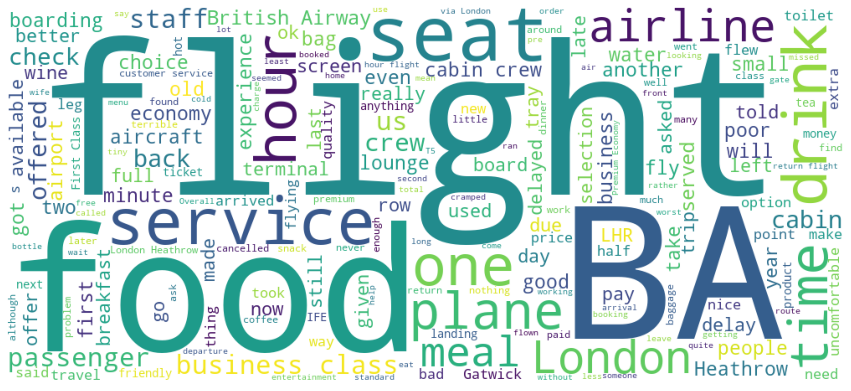

In [38]:
review_word = []

for i in data['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

The analysis is as follows:

1. Time to deliver the order is too long.
2. The service is not good.
3. The meals ar enot up to the mark.

# Analysis for value for money

In [41]:
data = df_soc[df_soc['reviews'].str.contains('money | refund & value')]
data['reviews'].to_csv('test2.csv')

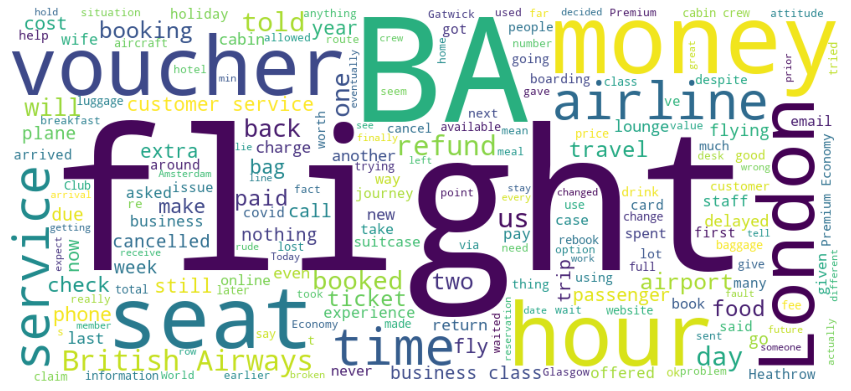

In [42]:
review_word = []

for i in data['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

The analysis is as follows: 

1. The refund takes a lot of time.
2. Forced usage of vouchers.
3. Delay of flights.